# Cofee Shop Sales Analisys

## Introducere

Acest set de date este ideal pentru a explora tendintele de vanzari in evolutie de-a lungul timpului, pentru a identifica zilele de varf de trafic al clientilor si pentru a explora valorile de performanta ale diferitelor produse. Setul de date cuprinde inregistrari tranzactionale de la Maven Roasters, o cafenea fictiva din New York care opereaza in trei locatii distincte. Acesta cuprinde detalii complete, cum ar fi datele tranzactiei, marcajele de timp, specificul geografic si informatiile la nivel de produs. Cercetatorii pot analiza frecventa vanzarilor de produse, pot identifica principalii factori de venit si pot investiga factorii care contribuie la fluctuatiile volumului vanzarilor.

## Cunoasterea Bazei de date

### Importuri

In [54]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plT
import math
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import time
from scipy.signal import savgol_filter


### Citirea Bazei de Date si afisare

In [55]:
df=pd.read_csv("coffee-shop-sales-revenue.csv",sep="|")
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


### Tipul coloanelor


In [56]:
df.dtypes

transaction_id        int64
transaction_date     object
transaction_time     object
transaction_qty       int64
store_id              int64
store_location       object
product_id            int64
unit_price          float64
product_category     object
product_type         object
product_detail       object
dtype: object

### Descrierea bazei de date

In [57]:
df.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.542509,2.074241,17.930020,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000


### Valorie unice din coloane(cate sunt)

In [58]:
df=pd.read_csv("coffee-shop-sales-revenue.csv",sep="|")
df=pd.DataFrame(df.nunique(), columns=['Unique values Count'])
print(df)

                  Unique values Count
transaction_id                 149116
transaction_date                  181
transaction_time                25762
transaction_qty                     6
store_id                            3
store_location                      3
product_id                         80
unit_price                         41
product_category                    9
product_type                       29
product_detail                     80


### Verificarea valorilor NULL sau NaN in Baza de date


In [59]:
missing_values = df.isnull().sum()

print("Valori lipsa in fiecare coloana:")
print(missing_values)

rows_with_missing_values = df[df.isnull().any(axis=1)]

print("\n Randuri cu valori lipsa:")
print(rows_with_missing_values)

Valori lipsa in fiecare coloana:
Unique values Count    0
dtype: int64

 Randuri cu valori lipsa:
Empty DataFrame
Columns: [Unique values Count]
Index: []


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, transaction_id to product_detail
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unique values Count  11 non-null     int64
dtypes: int64(1)
memory usage: 476.0+ bytes


### Eliminarea valorilor Null sau Nan si a randurilor duplicate

In [61]:
df=df.dropna()
df=df.drop_duplicates()
df

,Unique values Count
transaction_id,149116
transaction_date,181
transaction_time,25762
transaction_qty,6
store_id,3
product_id,80
unit_price,41
product_category,9
product_type,29


### Verific daca sunt randuri duplicate

In [62]:
verif_duplicates=df.duplicated().any()
verif_duplicates

np.False_

### Histograme pentru coloanele numerice

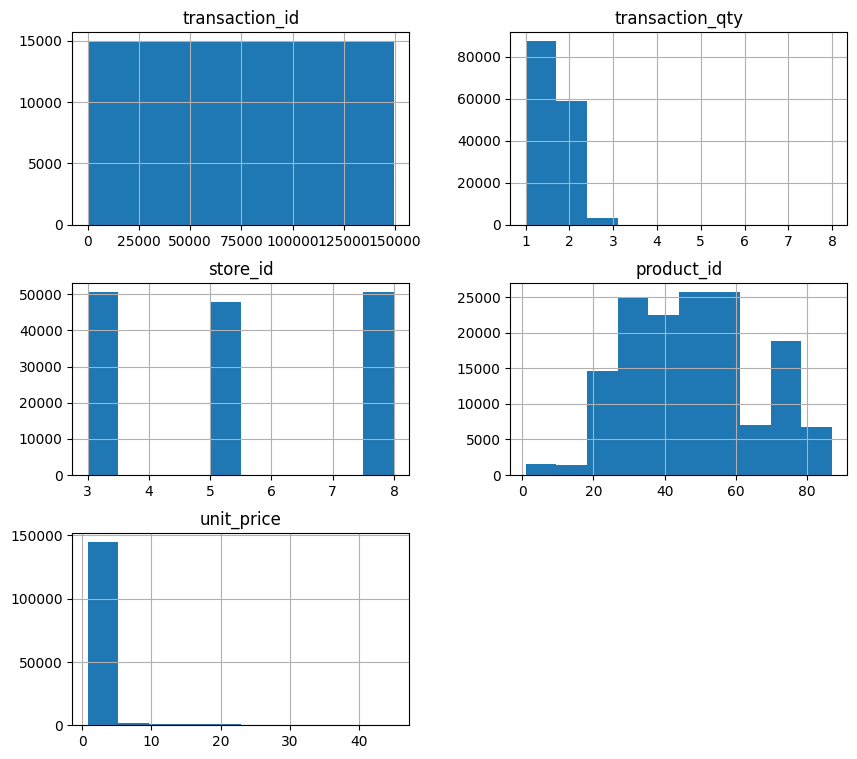

In [63]:
df=pd.read_csv("coffee-shop-sales-revenue.csv",sep="|")
numeric_cols = df.select_dtypes(include=['number']).columns
nr = 10
df[numeric_cols].hist(figsize=(10, 9), bins=nr)

plT.show()

### Histograme pentru store_id 3

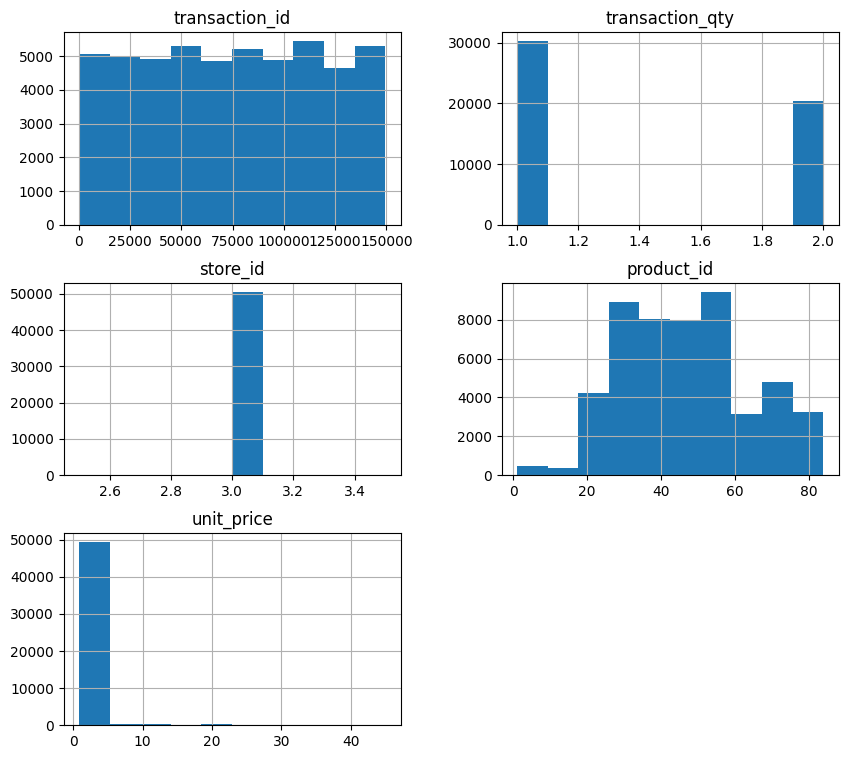

In [64]:

filtered_df_store_id_3 = df[df['store_id'] == 3]
nr = 10
filtered_df_store_id_3[numeric_cols].hist(figsize=(10, 9), bins=nr)
plT.show()

### Histograme pentru store_id 5

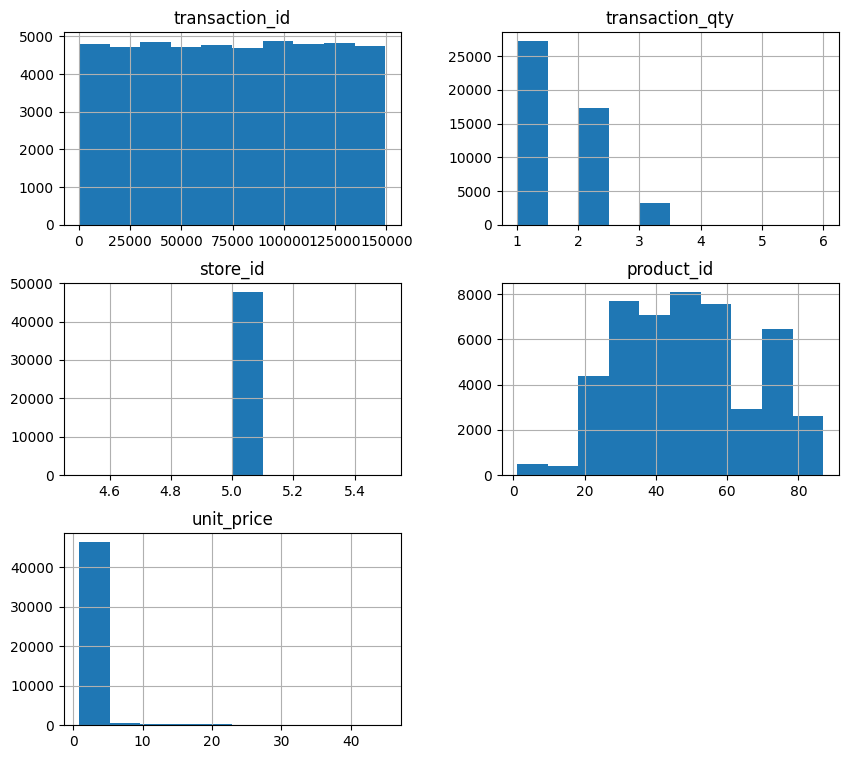

In [65]:
filtered_df_store_id_5 = df[df['store_id'] == 5]
nr = 10 
filtered_df_store_id_5[numeric_cols].hist(figsize=(10, 9), bins=nr)

plT.show()

### Histograme pentru store_id 8

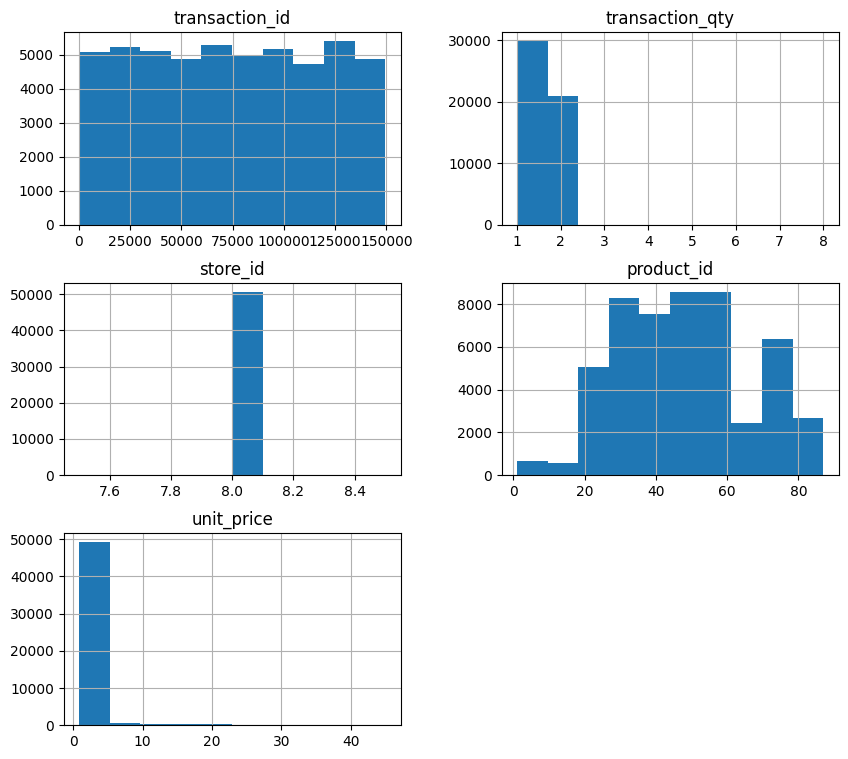

In [66]:
filtered_df_store_id_8= df[df['store_id'] == 8]
nr = 10  
filtered_df_store_id_8[numeric_cols].hist(figsize=(10, 9), bins=nr)
plT.show()

### Matrice de corelatie

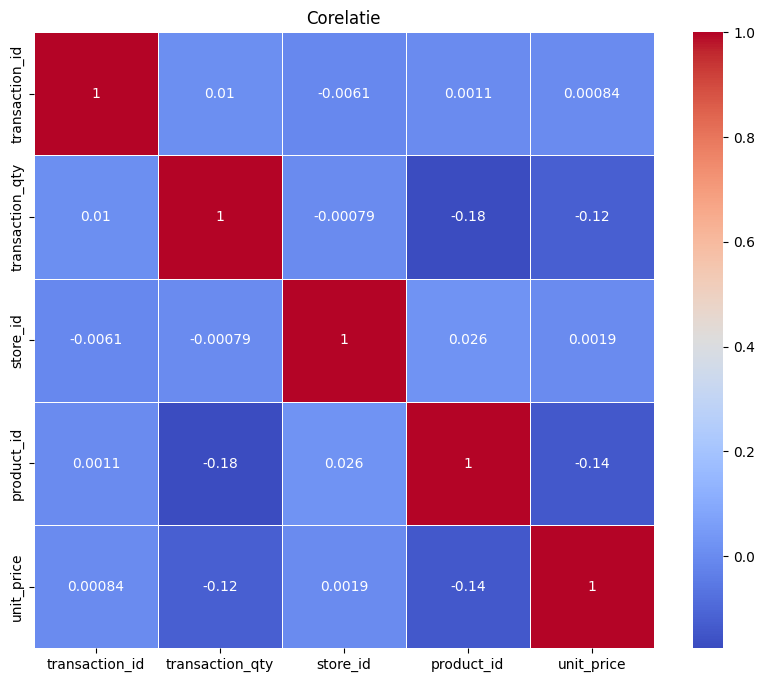

In [67]:


# Selectarea coloanelor numerice
numeric_df = df.select_dtypes(include=['number'])

# Calcularea matricei de corelatie
correlation_matrix = numeric_df.corr()



plT.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plT.title('Corelatie')
plT.show()

### Gini index

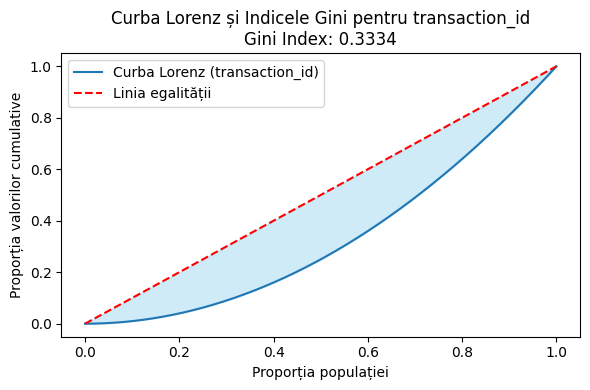

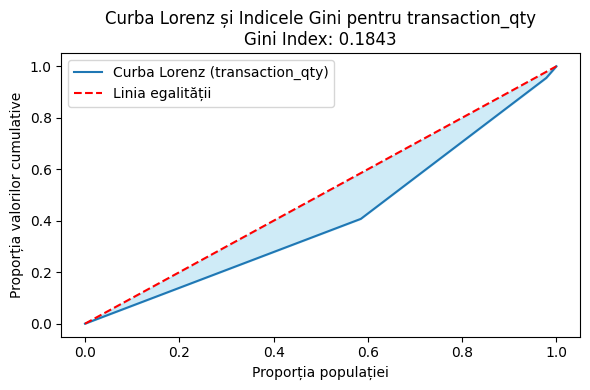

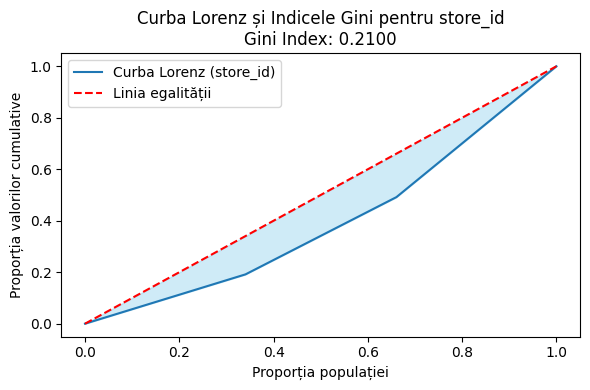

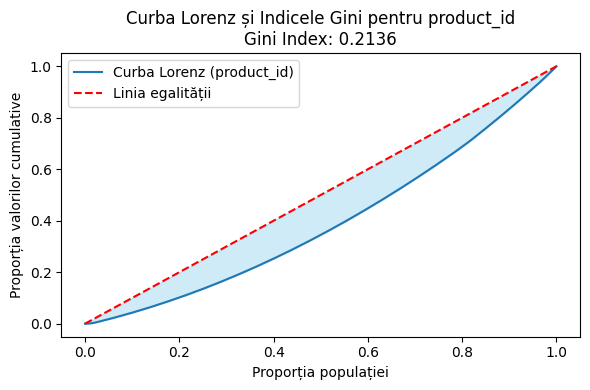

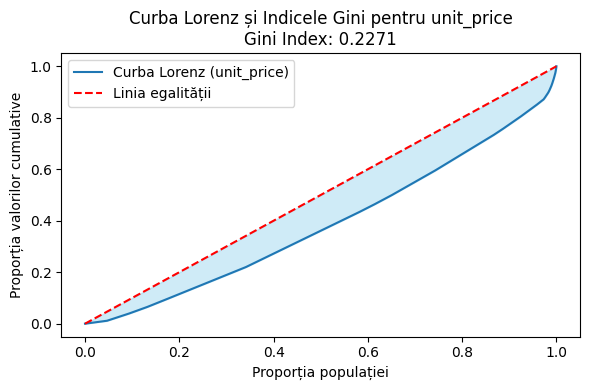

In [68]:
def lorenz_curve(array):
    array = np.sort(array)  # Sortare in ordine crescatoare
    cumulative_values = np.cumsum(array)  #Suma valori
    cumulative_values = np.insert(cumulative_values, 0, 0)  
    cumulative_values = cumulative_values / cumulative_values[-1]  # Normalizare la 1
    gini = 1 - 2 * np.trapezoid(cumulative_values, dx=1/len(array))  
    return cumulative_values, gini

numeric_cols = df.select_dtypes(include=['number'])

# Crearea curbelor Lorenz si calcularea indicelui Gini pentru fiecare coloana numerica
for col in numeric_cols.columns:
    values = numeric_cols[col].dropna().values  #Eliminare valori lipsa
    cumulative_values, gini = lorenz_curve(values)
    

    plT.figure(figsize=(6, 4))
    plT.plot(np.linspace(0, 1, len(cumulative_values)), cumulative_values, label=f'Curba Lorenz ({col})')
    plT.plot([0, 1], [0, 1], color='red', linestyle='--', label='Linia egalității')
    plT.fill_between(np.linspace(0, 1, len(cumulative_values)), cumulative_values, np.linspace(0, 1, len(cumulative_values)), color='skyblue', alpha=0.4)
    plT.title(f'Curba Lorenz și Indicele Gini pentru {col}\nGini Index: {gini:.4f}')
    plT.xlabel('Proporția populației')
    plT.ylabel('Proporția valorilor cumulative')
    plT.legend()
    plT.tight_layout()
    plT.show()

### Information Quantity

In [69]:
def entropy(column):
    probabilities = column.value_counts(normalize=True)
    probabilities = probabilities[probabilities > 0]
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Calcularea entropiei pentru fiecare coloana
entropy_values = {}
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':  # Pentru coloane categorice
        entropy_values[col] = entropy(df[col])
    elif np.issubdtype(df[col].dtype, np.number):  # Pentru coloane numerice
        entropy_values[col] = entropy(pd.cut(df[col], bins=10))  # Grupam valorile numerice in intervale

# Afisare entropiei
print("Entropia (Information Quantity) pentru fiecare coloana:")
for col, entropy in entropy_values.items():
    print(f"{col}: {entropy:.4f}")

Entropia (Information Quantity) pentru fiecare coloana:
transaction_id: 3.3219
transaction_date: 7.4365
transaction_time: 14.3346
transaction_qty: 1.1066
store_id: 1.5844
store_location: 1.5844
product_id: 2.9661
unit_price: 0.2518
product_category: 2.1508
product_type: 3.9336
product_detail: 5.9359


#### Entropia pentru fiecare coloana

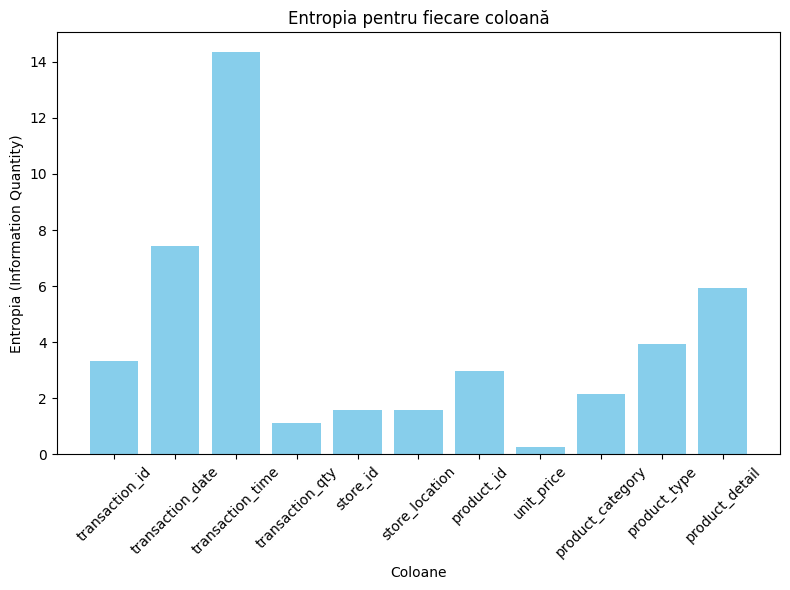

In [70]:

plT.figure(figsize=(8, 6))
plT.bar(entropy_values.keys(), entropy_values.values(), color='skyblue')
plT.xlabel('Coloane')
plT.ylabel('Entropia (Information Quantity)')
plT.title('Entropia pentru fiecare coloană')
plT.xticks(rotation=45)
plT.tight_layout()
plT.show()

### Store_id 3 Gini Index

Gini Index și Curba Lorenz pentru store_id 3:
  transaction_id: 0.3328


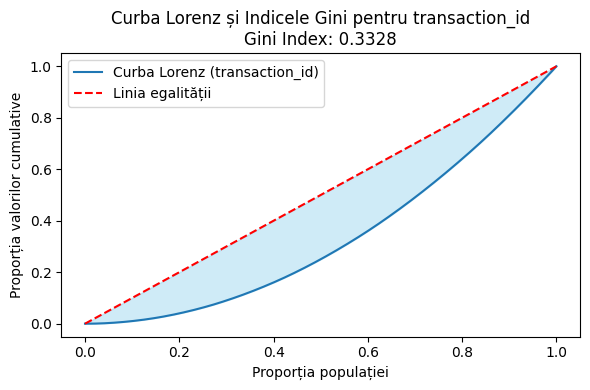

  transaction_qty: 0.1715


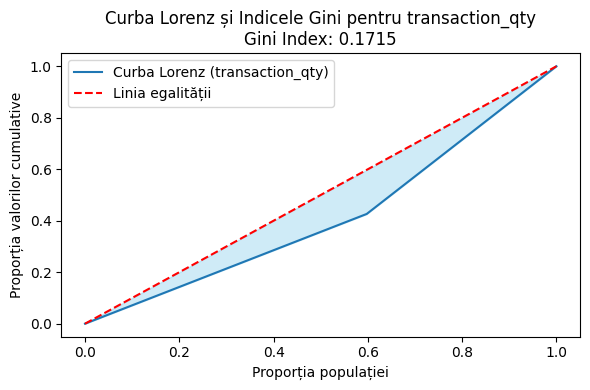

  product_id: 0.2068


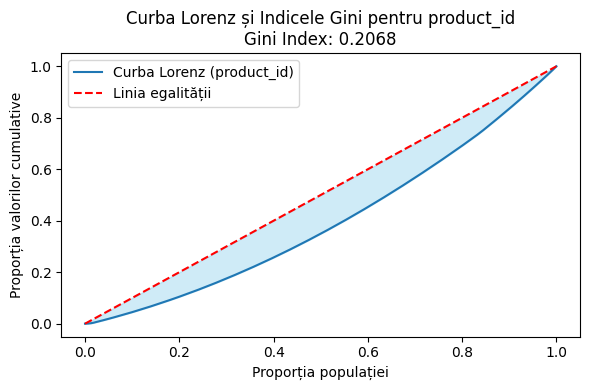

  unit_price: 0.2114


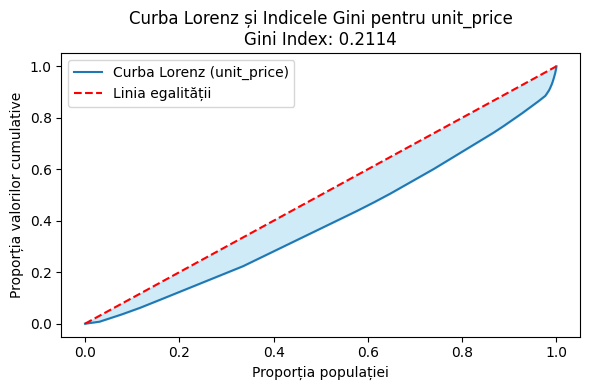

In [71]:
def gini_index_and_lorenz_curve(array):
    array = np.sort(array)  # Sortare în ordine crescatoare
    cumulative_values = np.cumsum(array)  # Suma valorilor
    cumulative_values = np.insert(cumulative_values, 0, 0)  
    cumulative_values = cumulative_values / cumulative_values[-1]  # Normalizam la 1
    gini = 1 - 2 * np.trapezoid(cumulative_values, dx=1/len(array))  # Calculam indicele Gini
    return gini, cumulative_values


# Filtrarea datelor pentru store_id = 3
filtered_df_store_id_3 = df[df['store_id'] == 3]

# Selectarea coloanelor numerice
numeric_cols = filtered_df_store_id_3.select_dtypes(include=['number']).drop(columns=['store_id'], errors='ignore')

# Calcularea Gini Index si desenarea curbei Lorenz pentru fiecare coloana numerica
print("Gini Index și Curba Lorenz pentru store_id 3:")
for col in numeric_cols.columns:
    if filtered_df_store_id_3[col].sum() > 0:  # Verificam dacă exista valori nenule
        gini, lorenz_curve = gini_index_and_lorenz_curve(filtered_df_store_id_3[col].values)
        print(f"  {col}: {gini:.4f}")
        
        # Desenarea curbei Lorenz
        plT.figure(figsize=(6, 4))
        plT.plot(np.linspace(0, 1, len(lorenz_curve)), lorenz_curve, label=f'Curba Lorenz ({col})')
        plT.plot([0, 1], [0, 1], color='red', linestyle='--', label='Linia egalității')
        plT.fill_between(np.linspace(0, 1, len(lorenz_curve)), lorenz_curve, np.linspace(0, 1, len(lorenz_curve)), color='skyblue', alpha=0.4)
        plT.title(f'Curba Lorenz și Indicele Gini pentru {col}\nGini Index: {gini:.4f}')
        plT.xlabel('Proporția populației')
        plT.ylabel('Proporția valorilor cumulative')
        plT.legend()
        plT.tight_layout()
        plT.show()
    else:
        print(f"  {col}: Nu se poate calcula (toate valorile sunt 0)")

### Store_id 5 Gini Index

Gini Index și Curba Lorenz pentru store_id 5:
  transaction_id: 0.3331


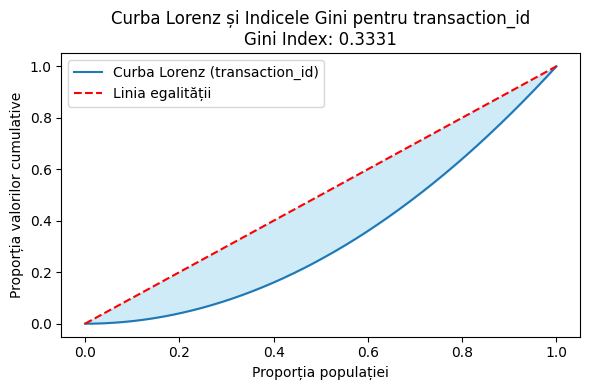

  transaction_qty: 0.2067


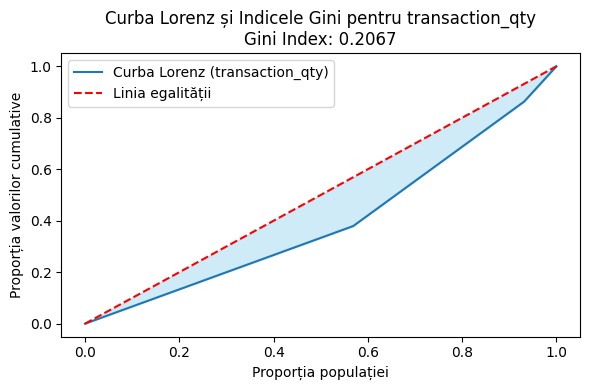

  product_id: 0.2140


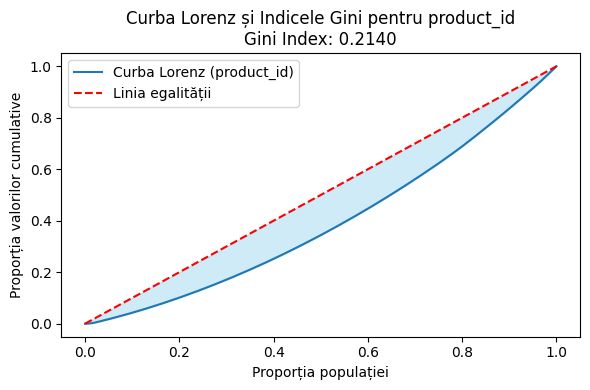

  unit_price: 0.2386


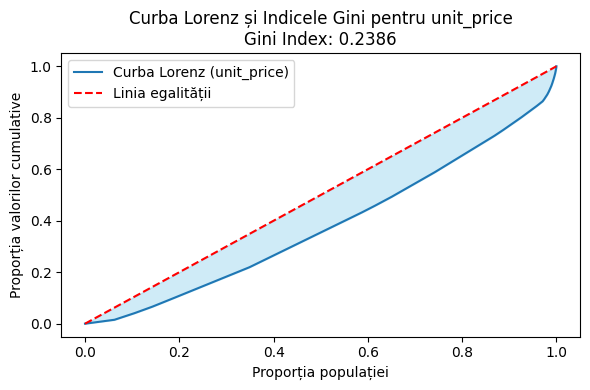

In [72]:
def gini_index_and_lorenz_curve(array):
    array = np.sort(array)  # Sortare in ordine crescatoare
    cumulative_values = np.cumsum(array)  # Suma valorilor
    cumulative_values = np.insert(cumulative_values, 0, 0)  
    cumulative_values = cumulative_values / cumulative_values[-1]  # Normalizam la 1
    gini = 1 - 2 * np.trapezoid(cumulative_values, dx=1/len(array))  # Calculam indicele Gini
    return gini, cumulative_values

# Filtrarea datelor pentru store_id = 5
filtered_df_store_id_5 = df[df['store_id'] == 5]

# Selectarea coloanelor numerice
numeric_cols = filtered_df_store_id_5.select_dtypes(include=['number']).drop(columns=['store_id'], errors='ignore')

# Calcularea Gini Index si desenarea curbei Lorenz pentru fiecare coloana numerica
print("Gini Index și Curba Lorenz pentru store_id 5:")
for col in numeric_cols.columns:
    if filtered_df_store_id_5[col].sum() > 0:  # Verificam daca exista valori nenule
        gini, lorenz_curve = gini_index_and_lorenz_curve(filtered_df_store_id_5[col].values)
        print(f"  {col}: {gini:.4f}")
        
        # Desenarea curbei Lorenz
        plT.figure(figsize=(6, 4))
        plT.plot(np.linspace(0, 1, len(lorenz_curve)), lorenz_curve, label=f'Curba Lorenz ({col})')
        plT.plot([0, 1], [0, 1], color='red', linestyle='--', label='Linia egalității')
        plT.fill_between(np.linspace(0, 1, len(lorenz_curve)), lorenz_curve, np.linspace(0, 1, len(lorenz_curve)), color='skyblue', alpha=0.4)
        plT.title(f'Curba Lorenz și Indicele Gini pentru {col}\nGini Index: {gini:.4f}')
        plT.xlabel('Proporția populației')
        plT.ylabel('Proporția valorilor cumulative')
        plT.legend()
        plT.tight_layout()
        plT.show()
    else:
        print(f"  {col}: Nu se poate calcula (toate valorile sunt 0)")

### Store_id 8 Gini Index

Gini Index și Curba Lorenz pentru store_id 8:
  transaction_id: 0.3341


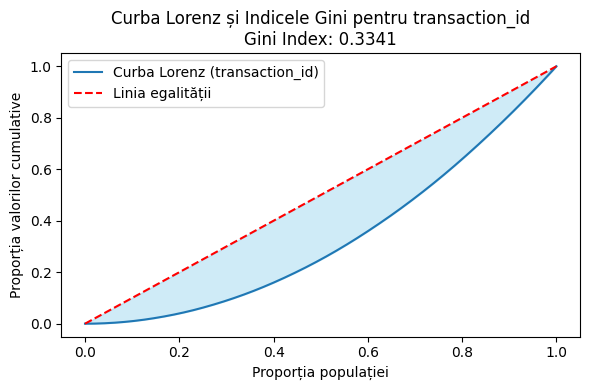

  transaction_qty: 0.1723


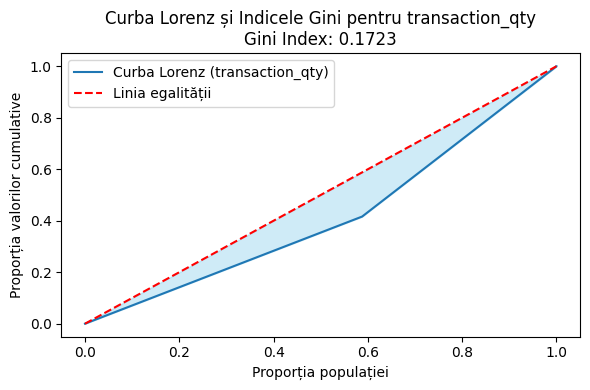

  product_id: 0.2187


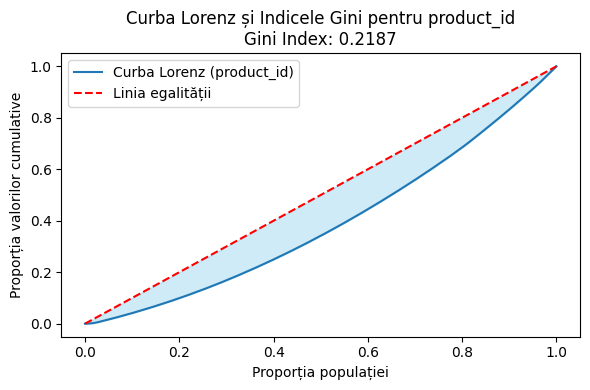

  unit_price: 0.2318


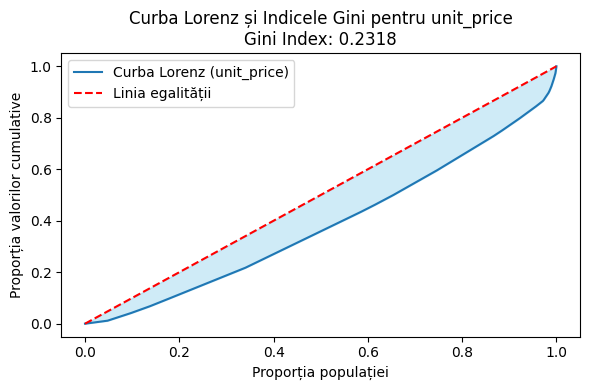

In [73]:
def gini_index_and_lorenz_curve(array):
    array = np.sort(array)  # Sortare în ordine crescatoare
    cumulative_values = np.cumsum(array)  # Suma valorilor
    cumulative_values = np.insert(cumulative_values, 0, 0)  
    cumulative_values = cumulative_values / cumulative_values[-1]  # Normalizam la 1
    gini = 1 - 2 * np.trapezoid(cumulative_values, dx=1/len(array))  # Calculam indicele Gini
    return gini, cumulative_values

# Filtrarea datelor pentru store_id = 8
filtered_df_store_id_8 = df[df['store_id'] == 8]

# Selectarea coloanelor numerice
numeric_cols = filtered_df_store_id_8.select_dtypes(include=['number']).drop(columns=['store_id'], errors='ignore')

# Calcularea Gini Index si desenarea curbei Lorenz pentru fiecare coloana numerica
print("Gini Index și Curba Lorenz pentru store_id 8:")
for col in numeric_cols.columns:
    if filtered_df_store_id_8[col].sum() > 0:  # Verificam daca exista valori nenule
        gini, lorenz_curve = gini_index_and_lorenz_curve(filtered_df_store_id_8[col].values)
        print(f"  {col}: {gini:.4f}")
        
        # Desenarea curbei Lorenz
        plT.figure(figsize=(6, 4))
        plT.plot(np.linspace(0, 1, len(lorenz_curve)), lorenz_curve, label=f'Curba Lorenz ({col})')
        plT.plot([0, 1], [0, 1], color='red', linestyle='--', label='Linia egalității')
        plT.fill_between(np.linspace(0, 1, len(lorenz_curve)), lorenz_curve, np.linspace(0, 1, len(lorenz_curve)), color='skyblue', alpha=0.4)
        plT.title(f'Curba Lorenz și Indicele Gini pentru {col}\nGini Index: {gini:.4f}')
        plT.xlabel('Proporția populației')
        plT.ylabel('Proporția valorilor cumulative')
        plT.legend()
        plT.tight_layout()
        plT.show()
    else:
        print(f"  {col}: Nu se poate calcula (toate valorile sunt 0)")

## Matricea de confuzie

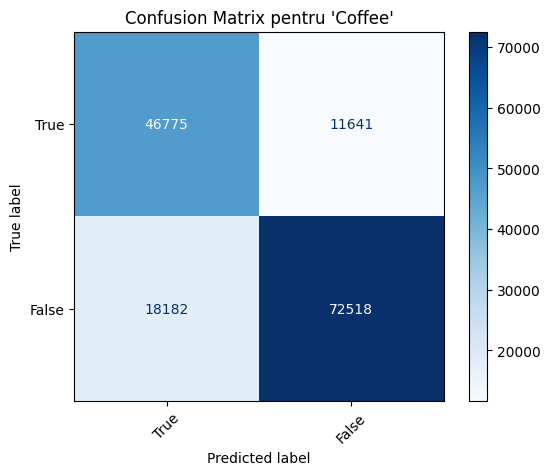

In [74]:


target_class = 'Coffee' 
true_labels_binary = (df['product_category'] == target_class).astype(int)  # 1 pentru clasa dorita, 0 altfel

np.random.seed(42) 
predicted_labels_binary = true_labels_binary.copy()
indices_to_modify = np.random.choice(len(true_labels_binary), size=int(0.2 * len(true_labels_binary)), replace=False)  # 20% zgomot
predicted_labels_binary.iloc[indices_to_modify] = 1 - predicted_labels_binary.iloc[indices_to_modify]  

# Calculam matricea de confuzie
cm = confusion_matrix(true_labels_binary, predicted_labels_binary, labels=[1, 0]) 

# Afisam matricea de confuzie
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['True', 'False'])
disp.plot(cmap='Blues', xticks_rotation=45)
plT.title(f"Confusion Matrix pentru '{target_class}'")
plT.show()

# Antrenarea și evaluarea modelelor pentru predicția vânzărilor viitoare


Maparea valorilor codificate pentru locații:
  0: Astoria
  1: Hell's Kitchen
  2: Lower Manhattan

2. Agregarea datelor la nivel de produs și lună...

3. Analizarea distribuției vânzărilor pe locații...
Locația Astoria: cantitate medie = 150.09, min = 1.00, max = 421.00, mediana = 153.00, nr. înregistrări = 473.0
Locația Hell's Kitchen: cantitate medie = 149.45, min = 2.00, max = 435.00, mediana = 154.50, nr. înregistrări = 480.0
Locația Lower Manhattan: cantitate medie = 149.46, min = 2.00, max = 383.00, mediana = 154.00, nr. înregistrări = 480.0

4. Adăugarea caracteristicilor de interacțiune...

5. Pregătirea caracteristicilor și țintelor pentru modelare...

Top 10 produse după cantitatea vândută:
Locația: Hell's Kitchen, Produs: Coffee - Barista Espresso - Ouro Brasileiro shot, Cantitate: 435.00
Locația: Astoria, Produs: Drinking Chocolate - Hot chocolate - Dark chocolate Lg, Cantitate: 421.00
Locația: Astoria, Produs: Tea - Brewed Black tea - Earl Grey Rg, Cantitate: 401.00
Loca

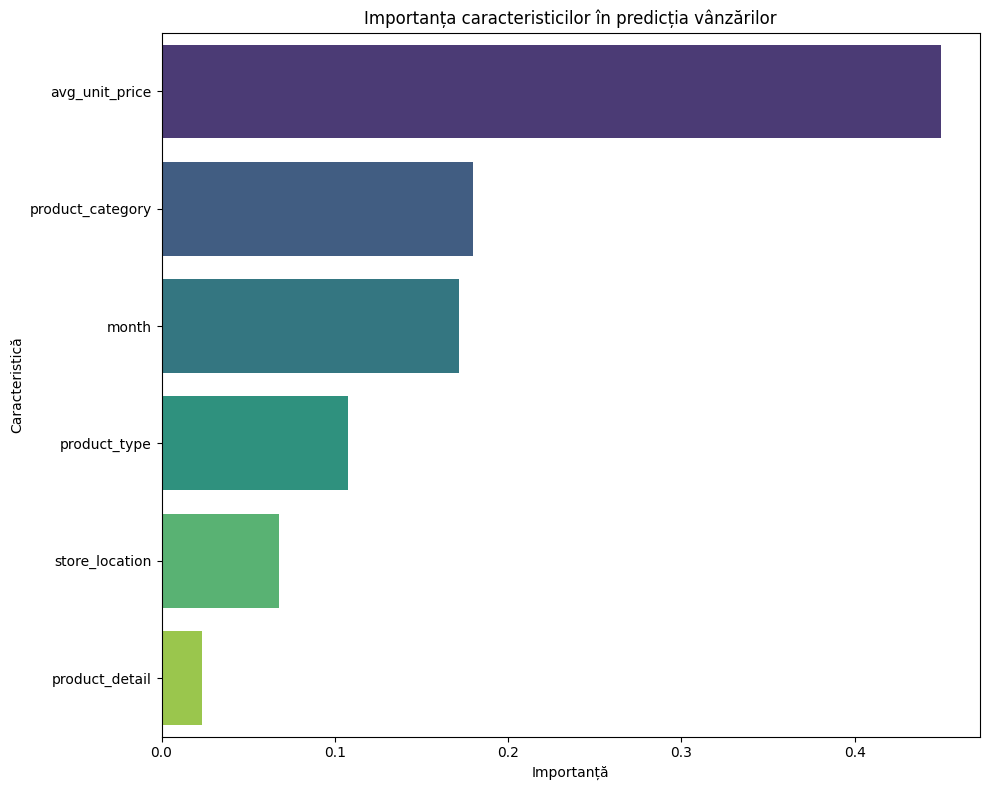


12. Verificarea diferențierii predicțiilor între locații...
Locația Astoria:
  Număr de produse în test: 95
  Medie cantitate reală: 140.48
  Medie cantitate prezisă: 198.88
  R² local: 0.6577, MSE local: 5357.9869
  Produs cel mai bine vândut (prezis): Tea - Brewed Green tea - Serenity Green Tea Rg
  Cantitate prezisă: 500.43

Locația Hell's Kitchen:
  Număr de produse în test: 96
  Medie cantitate reală: 149.05
  Medie cantitate prezisă: 174.50
  R² local: 0.9082, MSE local: 1265.0517
  Produs cel mai bine vândut (prezis): Coffee - Barista Espresso - Latte Rg
  Cantitate prezisă: 397.00

Locația Lower Manhattan:
  Număr de produse în test: 96
  Medie cantitate reală: 149.61
  Medie cantitate prezisă: 155.76
  R² local: 0.9652, MSE local: 537.7021
  Produs cel mai bine vândut (prezis): Coffee - Drip coffee - Our Old Time Diner Blend Sm
  Cantitate prezisă: 343.24



In [75]:
# 1. Preprocesarea datelor
df['month'] = pd.to_datetime(df['transaction_date']).dt.month

# Codificarea coloanelor categorice
categorical_columns = ["store_location", "product_category", "product_type", "product_detail"]
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Afișăm categoriile pentru referință
print("\nMaparea valorilor codificate pentru locații:")
for i, loc in enumerate(label_encoders["store_location"].classes_):
    print(f"  {i}: {loc}")

# 2. Agregarea datelor la nivel de produs și lună
print("\n2. Agregarea datelor la nivel de produs și lună...")

product_sales = df.groupby(['store_location', 'product_category', 'product_type', 'product_detail', 'month']).agg(
    total_qty_sold=('transaction_qty', 'sum'),
    avg_unit_price=('unit_price', 'mean')
).reset_index()

# 3. Vizualizăm distribuția cantităților vândute pentru fiecare locație
print("\n3. Analizarea distribuției vânzărilor pe locații...")
location_sales_summary = product_sales.groupby('store_location').agg(
    avg_qty=('total_qty_sold', 'mean'),
    min_qty=('total_qty_sold', 'min'),
    max_qty=('total_qty_sold', 'max'),
    median_qty=('total_qty_sold', 'median'),
    count=('total_qty_sold', 'count')
).reset_index()

for _, row in location_sales_summary.iterrows():
    loc_name = label_encoders['store_location'].inverse_transform([int(row['store_location'])])[0]
    print(f"Locația {loc_name}: cantitate medie = {row['avg_qty']:.2f}, min = {row['min_qty']:.2f}, max = {row['max_qty']:.2f}, mediana = {row['median_qty']:.2f}, nr. înregistrări = {row['count']}")

# 4. Adăugarea caracteristicilor de interacțiune (modificat - am eliminat loc_cat)
print("\n4. Adăugarea caracteristicilor de interacțiune...")
# Păstrăm doar interacțiunile între locație-tip și lună-locație
product_sales['loc_type'] = product_sales['store_location'].astype(str) + '_' + product_sales['product_type'].astype(str)
product_sales['month_loc'] = product_sales['month'].astype(str) + '_' + product_sales['store_location'].astype(str)

# 5. Adăugarea variabilei de clasificare pentru produse populare
popularity_threshold = np.percentile(product_sales['total_qty_sold'], 75)
product_sales['is_popular'] = (product_sales['total_qty_sold'] >= popularity_threshold).astype(int)

# 6. Selectarea caracteristicilor și țintelor
print("\n5. Pregătirea caracteristicilor și țintelor pentru modelare...")

# Caracteristici de bază fără caracteristicile loc_cat
sales_features = ['store_location', 'product_category', 'product_type', 'product_detail', 'month', 'avg_unit_price']

target_sales_regression = 'total_qty_sold'  # Pentru regresie - predicția cantității exacte
target_sales_classification = 'is_popular'   # Pentru clasificare - dacă un produs va fi popular

# Adăugăm o ponderare pentru locație (pentru a crește importanța acesteia în model)
location_weights = {
    0: 1.5,  # Astoria
    1: 1.2,  # Hell's Kitchen
    2: 1.0,  # Lower Manhattan
}

# Aplicăm ponderile la cantitățile vândute (doar pentru antrenare)
product_sales['weighted_qty'] = product_sales.apply(
    lambda row: row['total_qty_sold'] * location_weights.get(row['store_location'], 1.0),
    axis=1
)

X_sales = product_sales[sales_features]
y_sales_regression = product_sales[target_sales_regression]
y_sales_weighted = product_sales['weighted_qty']  # Pentru antrenare cu ponderare
y_sales_classification = product_sales[target_sales_classification]

# 7. Examinăm datele pentru top produse
top_selling_products = product_sales.sort_values('total_qty_sold', ascending=False).head(10)
print("\nTop 10 produse după cantitatea vândută:")
for _, row in top_selling_products.iterrows():
    loc_name = label_encoders['store_location'].inverse_transform([int(row['store_location'])])[0]
    cat_name = label_encoders['product_category'].inverse_transform([int(row['product_category'])])[0]
    type_name = label_encoders['product_type'].inverse_transform([int(row['product_type'])])[0]
    detail_name = label_encoders['product_detail'].inverse_transform([int(row['product_detail'])])[0]
    print(f"Locația: {loc_name}, Produs: {cat_name} - {type_name} - {detail_name}, Cantitate: {row['total_qty_sold']:.2f}")

# 8. Împărțirea datelor în seturi de antrenament și testare
print("\n6. Împărțirea datelor pentru antrenament și testare...")
X_train_sales, X_test_sales, y_train_sales_reg, y_test_sales_reg = train_test_split(
    X_sales, y_sales_regression, test_size=0.2, random_state=42, stratify=X_sales['store_location']
)

# Pentru antrenarea cu cantități ponderate
_, _, y_train_sales_weighted, _ = train_test_split(
    X_sales, y_sales_weighted, test_size=0.2, random_state=42, stratify=X_sales['store_location']
)

X_train_sales_clf, X_test_sales_clf, y_train_sales_clf, y_test_sales_clf = train_test_split(
    X_sales, y_sales_classification, test_size=0.2, random_state=42, 
    stratify=product_sales[['store_location', 'is_popular']]
)

print(f"Dimensiune set de antrenament: {X_train_sales.shape[0]} rânduri")
print(f"Dimensiune set de testare: {X_test_sales.shape[0]} rânduri")

# 9. Crearea pipeline-urilor pentru a evita data leakage
print("\n7. Crearea și antrenarea modelelor...")

# Pipeline pentru Linear Regression
pipe_lin_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression(fit_intercept=True, positive=False))
])

# Pipeline pentru Logistic Regression
pipe_log_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression(max_iter=5000, random_state=42, 
                                              class_weight="balanced", C=1.0))
])

# Pipeline pentru Random Forest cu parametri pentru a reduce overfitting și a crește diversitatea
pipe_rf_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', RandomForestRegressor(
        n_estimators=200,
        max_depth=20,
        min_samples_leaf=5,
        max_features='sqrt',
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    ))
])

# 10. Antrenarea modelelor folosind pipeline-uri
print("\n8. Antrenarea modelelor...")

# 10.1 Antrenarea Linear Regression
print("\n8.1 Antrenarea Linear Regression...")
pipe_lin_reg.fit(X_train_sales, y_train_sales_reg)
y_pred_lin_sales = pipe_lin_reg.predict(X_test_sales)
mse_lin_sales = mean_squared_error(y_test_sales_reg, y_pred_lin_sales)
r2_lin_sales = r2_score(y_test_sales_reg, y_pred_lin_sales)

# 10.2 Antrenarea Logistic Regression
print("\n8.2 Antrenarea Logistic Regression...")
pipe_log_reg.fit(X_train_sales_clf, y_train_sales_clf)
y_pred_log_sales = pipe_log_reg.predict(X_test_sales_clf)
accuracy_log_sales = accuracy_score(y_test_sales_clf, y_pred_log_sales)

# 10.3 Antrenarea Random Forest Regression (cu cantitățile ponderate)
print("\n8.3 Antrenarea Random Forest Regression...")
pipe_rf_reg.fit(X_train_sales, y_train_sales_weighted)
y_pred_rf_sales = pipe_rf_reg.predict(X_test_sales)
mse_rf_sales = mean_squared_error(y_test_sales_reg, y_pred_rf_sales)
r2_rf_sales = r2_score(y_test_sales_reg, y_pred_rf_sales)

# 11. Evaluarea modelelor
print("\n9. Evaluarea modelelor pe setul de test:")
print("\nLinear Regression (predicția cantității vândute):")
print(f"  MSE: {mse_lin_sales:.4f}, R²: {r2_lin_sales:.4f}")

print("\nLogistic Regression (clasificarea produselor populare):")
print(f"  Acuratețe: {accuracy_log_sales:.4f}")
print(f"  Raport de clasificare:\n{classification_report(y_test_sales_clf, y_pred_log_sales)}")

print("\nRandom Forest Regression (predicția cantității vândute):")
print(f"  MSE: {mse_rf_sales:.4f}, R²: {r2_rf_sales:.4f}")

# 12. Cross-validation cu KFold pentru control mai bun
print("\n10. Evaluarea modelelor prin cross-validation (5-fold)...")

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation pentru Random Forest Regression
cv_scores_rf_sales = cross_val_score(pipe_rf_reg, X_sales, y_sales_weighted, 
                                   cv=kf, scoring='r2', n_jobs=-1)
mean_r2_rf_cv = cv_scores_rf_sales.mean()
std_r2_rf_cv = cv_scores_rf_sales.std()

# Afișează rezultatele cross-validation
print(f"Random Forest Regression: R² mediu = {mean_r2_rf_cv:.4f} (±{std_r2_rf_cv:.4f})")

# 13. Importanța caracteristicilor pentru Random Forest
rf_model = pipe_rf_reg.named_steps['random_forest']
rf_feature_importances = pd.DataFrame({
    'Caracteristică': sales_features,
    'Importanță': rf_model.feature_importances_
}).sort_values('Importanță', ascending=False)

print("\n11. Importanța caracteristicilor în modelul final:")
print(rf_feature_importances.head(10))

plT.figure(figsize=(10, 8))
sns.barplot(data=rf_feature_importances, y='Caracteristică', x='Importanță', hue='Caracteristică', palette='viridis', legend=False)
plT.title('Importanța caracteristicilor în predicția vânzărilor')
plT.xlabel('Importanță')
plT.ylabel('Caracteristică')
plT.tight_layout()
plT.show()

# 14. Evaluăm predicțiile pe locații diferite
print("\n12. Verificarea diferențierii predicțiilor între locații...")

# Separăm setul de test pe locații
location_predictions = {}
location_actuals = {}

for location_code in np.sort(X_test_sales['store_location'].unique()):
    location_mask = X_test_sales['store_location'] == location_code
    location_name = label_encoders['store_location'].inverse_transform([location_code])[0]
    
    # Extragem datele pentru această locație
    X_loc = X_test_sales[location_mask]
    y_loc_actual = y_test_sales_reg[location_mask]
    
    # Facem predicții pentru această locație
    y_loc_pred = pipe_rf_reg.predict(X_loc)
    
    # Calculăm metrici pe locație
    r2_loc = r2_score(y_loc_actual, y_loc_pred) if len(y_loc_actual) > 1 else "N/A"
    mse_loc = mean_squared_error(y_loc_actual, y_loc_pred) if len(y_loc_actual) > 1 else "N/A"
    
    # Stocăm pentru analiză
    location_predictions[location_name] = y_loc_pred
    location_actuals[location_name] = y_loc_actual
    
    print(f"Locația {location_name}:")
    print(f"  Număr de produse în test: {len(y_loc_actual)}")
    print(f"  Medie cantitate reală: {np.mean(y_loc_actual):.2f}")
    print(f"  Medie cantitate prezisă: {np.mean(y_loc_pred):.2f}")
    if isinstance(r2_loc, float):
        print(f"  R² local: {r2_loc:.4f}, MSE local: {mse_loc:.4f}")
    else:
        print(f"  R² local: {r2_loc}, MSE local: {mse_loc}")
    
    # Identificăm produsul cel mai bine vândut pentru această locație
    if len(y_loc_pred) > 0:
        best_idx = np.argmax(y_loc_pred)
        best_product = X_loc.iloc[best_idx]
        cat_name = label_encoders['product_category'].inverse_transform([int(best_product['product_category'])])[0]
        type_name = label_encoders['product_type'].inverse_transform([int(best_product['product_type'])])[0]
        detail_name = label_encoders['product_detail'].inverse_transform([int(best_product['product_detail'])])[0]
        
        print(f"  Produs cel mai bine vândut (prezis): {cat_name} - {type_name} - {detail_name}")
        print(f"  Cantitate prezisă: {y_loc_pred[best_idx]:.2f}")
        print()

# 15. Stocăm modelele și scalerii pentru utilizare ulterioară
# Stocăm toate variabilele importante pentru predicții viitoare
best_rf_model_sales = pipe_rf_reg
scaler_sales = pipe_rf_reg.named_steps['scaler']

# Pentru compatibilitate cu celule anterioare
best_rf_reg_sales = best_rf_model_sales

# Optimizarea hiperparametrilor pentru toate modelele și compararea performanței

In [76]:





print("=== Optimizarea Hiperparametrilor pentru Toate Modelele și Compararea Performanței ===")

# Verificăm că datele necesare sunt disponibile din celulele anterioare
required_vars = [
    'X_train_sales', 'X_test_sales', 'y_train_sales_reg', 'y_test_sales_reg',
    'X_train_sales_clf', 'X_test_sales_clf', 'y_train_sales_clf', 'y_test_sales_clf',
    'pipe_lin_reg', 'pipe_log_reg', 'pipe_rf_reg'
]
missing_vars = [var for var in required_vars if var not in globals()]

if missing_vars:
    print(f"⚠️ Lipsesc variabilele: {', '.join(missing_vars)}. Rulați mai întâi celulele de pregătire a datelor.")
else:
    # 0. Evaluăm modelele de bază (baseline) înainte de optimizare
    print("\n1. Evaluarea modelelor de bază (baseline)...")
    
    # Evaluăm Linear Regression
    pipe_lin_reg.fit(X_train_sales, y_train_sales_reg)
    y_pred_lin_baseline = pipe_lin_reg.predict(X_test_sales)
    mse_lin_baseline = mean_squared_error(y_test_sales_reg, y_pred_lin_baseline)
    r2_lin_baseline = r2_score(y_test_sales_reg, y_pred_lin_baseline)
    
    # Evaluăm Logistic Regression
    pipe_log_reg.fit(X_train_sales_clf, y_train_sales_clf)
    y_pred_log_baseline = pipe_log_reg.predict(X_test_sales_clf)
    acc_log_baseline = accuracy_score(y_test_sales_clf, y_pred_log_baseline)
    
    # Evaluăm Random Forest Regression
    pipe_rf_reg.fit(X_train_sales, y_train_sales_reg)
    y_pred_rf_baseline = pipe_rf_reg.predict(X_test_sales)
    mse_rf_baseline = mean_squared_error(y_test_sales_reg, y_pred_rf_baseline)
    r2_rf_baseline = r2_score(y_test_sales_reg, y_pred_rf_baseline)
    
    print("\nPerformanța modelelor de bază (baseline) pe setul de test:")
    print(f"Linear Regression: MSE = {mse_lin_baseline:.4f}, R² = {r2_lin_baseline:.4f}")
    print(f"Logistic Regression: Acuratețe = {acc_log_baseline:.4f}")
    print(f"Random Forest Regression: MSE = {mse_rf_baseline:.4f}, R² = {r2_rf_baseline:.4f}")
    
    # 1. Definim parametrii pentru căutare pentru fiecare model
    print("\n2. Definirea parametrilor pentru optimizare...")
    
    # Parametri pentru Linear Regression - CORECTAT: eliminat 'normalize' care nu mai e suportat
    lin_reg_params = {
        'linear_regression__fit_intercept': [True, False],
        'linear_regression__positive': [True, False],  # Restricție pentru coeficienți pozitivi
        'linear_regression__copy_X': [True, False]     # Dacă să se copieze X sau să se modifice direct
    }
    
    # Parametri pentru Logistic Regression
    log_reg_params = {
        'logistic_regression__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
        'logistic_regression__solver': ['liblinear', 'saga'],
        'logistic_regression__class_weight': ['balanced', None],
        'logistic_regression__max_iter': [5000]
    }
    
    # Parametri pentru Random Forest (simplificat față de optimizarea anterioară)
    rf_reg_params = {
        'random_forest__n_estimators': [100, 200, 300],
        'random_forest__max_depth': [None, 10, 20],
        'random_forest__min_samples_split': [2, 5],
        'random_forest__min_samples_leaf': [1, 2]
    }
    
    # 2. Inițializăm și aplicăm RandomizedSearchCV pentru fiecare model
    
    n_iter_search = 10  # Numărul de iterații pentru RandomizedSearchCV
    
    # 2.1 Linear Regression
    print("\n3.1 Optimizare Linear Regression...")
    start_time = time.time()
    
    lin_reg_search = GridSearchCV(
        pipe_lin_reg,
        param_grid=lin_reg_params,
        cv=3,
        scoring='r2',
        verbose=1,
        n_jobs=-1
    )
    
    lin_reg_search.fit(X_train_sales, y_train_sales_reg)
    lin_search_time = time.time() - start_time
    
    # 2.2 Logistic Regression
    print("\n3.2 Optimizare Logistic Regression...")
    start_time = time.time()
    
    log_reg_search = RandomizedSearchCV(
        pipe_log_reg,
        param_distributions=log_reg_params,
        n_iter=n_iter_search,
        cv=3,
        scoring='accuracy',
        verbose=1,
        random_state=42,
        n_jobs=-1
    )
    
    log_reg_search.fit(X_train_sales_clf, y_train_sales_clf)
    log_search_time = time.time() - start_time
    
    # 2.3 Random Forest Regression
    print("\n3.3 Optimizare Random Forest Regression...")
    start_time = time.time()
    
    rf_reg_search = RandomizedSearchCV(
        pipe_rf_reg,
        param_distributions=rf_reg_params,
        n_iter=n_iter_search,
        cv=3,
        scoring='r2',
        verbose=1,
        random_state=42,
        n_jobs=-1
    )
    
    rf_reg_search.fit(X_train_sales, y_train_sales_reg)
    rf_search_time = time.time() - start_time
    
    # 3. Extragem și afișăm cei mai buni parametri pentru fiecare model
    print("\n4. Cei mai buni hiperparametri găsiți:")
    
    print("\nLinear Regression:")
    for param, value in lin_reg_search.best_params_.items():
        print(f"  {param.replace('linear_regression__', '')}: {value}")
    
    print("\nLogistic Regression:")
    for param, value in log_reg_search.best_params_.items():
        print(f"  {param.replace('logistic_regression__', '')}: {value}")
    
    print("\nRandom Forest Regression:")
    for param, value in rf_reg_search.best_params_.items():
        print(f"  {param.replace('random_forest__', '')}: {value}")
    
    # 4. Evaluăm modelele optimizate pe setul de test
    print("\n5. Evaluarea modelelor optimizate pe setul de test...")
    
    # 4.1 Linear Regression optimizat
    best_lin_reg = lin_reg_search.best_estimator_
    y_pred_lin_optimized = best_lin_reg.predict(X_test_sales)
    mse_lin_optimized = mean_squared_error(y_test_sales_reg, y_pred_lin_optimized)
    r2_lin_optimized = r2_score(y_test_sales_reg, y_pred_lin_optimized)
    
    # 4.2 Logistic Regression optimizat
    best_log_reg = log_reg_search.best_estimator_
    y_pred_log_optimized = best_log_reg.predict(X_test_sales_clf)
    acc_log_optimized = accuracy_score(y_test_sales_clf, y_pred_log_optimized)
    
    # 4.3 Random Forest Regression optimizat
    best_rf_reg = rf_reg_search.best_estimator_
    y_pred_rf_optimized = best_rf_reg.predict(X_test_sales)
    mse_rf_optimized = mean_squared_error(y_test_sales_reg, y_pred_rf_optimized)
    r2_rf_optimized = r2_score(y_test_sales_reg, y_pred_rf_optimized)
    
    # 5. Comparăm rezultatele înainte și după optimizare
    print("\n6. Comparația performanței înainte și după optimizarea hiperparametrilor:")
    
    # 5.1 Linear Regression
    lin_mse_improvement = ((mse_lin_baseline - mse_lin_optimized) / mse_lin_baseline) * 100 if mse_lin_baseline > 0 else 0
    lin_r2_improvement = ((r2_lin_optimized - r2_lin_baseline) / abs(r2_lin_baseline)) * 100 if r2_lin_baseline != 0 else 0
    
    print("\nLinear Regression:")
    print(f"  MSE (Baseline): {mse_lin_baseline:.4f} -> MSE (Optimizat): {mse_lin_optimized:.4f} " +
          f"(Îmbunătățire: {lin_mse_improvement:.2f}%)")
    print(f"  R² (Baseline): {r2_lin_baseline:.4f} -> R² (Optimizat): {r2_lin_optimized:.4f} " +
          f"(Îmbunătățire: {lin_r2_improvement:.2f}%)")
    print(f"  Timp optimizare: {lin_search_time:.2f} secunde")
    
    # 5.2 Logistic Regression
    log_acc_improvement = ((acc_log_optimized - acc_log_baseline) / acc_log_baseline) * 100 if acc_log_baseline > 0 else 0
    
    print("\nLogistic Regression:")
    print(f"  Acuratețe (Baseline): {acc_log_baseline:.4f} -> Acuratețe (Optimizat): {acc_log_optimized:.4f} " +
          f"(Îmbunătățire: {log_acc_improvement:.2f}%)")
    print(f"  Timp optimizare: {log_search_time:.2f} secunde")
    
    # Afișăm și raportul de clasificare pentru modelul optimizat
    print("\n  Raport de clasificare pentru Logistic Regression optimizat:")
    print(classification_report(y_test_sales_clf, y_pred_log_optimized))
    
    # 5.3 Random Forest Regression
    rf_mse_improvement = ((mse_rf_baseline - mse_rf_optimized) / mse_rf_baseline) * 100 if mse_rf_baseline > 0 else 0
    rf_r2_improvement = ((r2_rf_optimized - r2_rf_baseline) / abs(r2_rf_baseline)) * 100 if r2_rf_baseline != 0 else 0
    
    print("\nRandom Forest Regression:")
    print(f"  MSE (Baseline): {mse_rf_baseline:.4f} -> MSE (Optimizat): {mse_rf_optimized:.4f} " +
          f"(Îmbunătățire: {rf_mse_improvement:.2f}%)")
    print(f"  R² (Baseline): {r2_rf_baseline:.4f} -> R² (Optimizat): {r2_rf_optimized:.4f} " +
          f"(Îmbunătățire: {rf_r2_improvement:.2f}%)")
    print(f"  Timp optimizare: {rf_search_time:.2f} secunde")

    # 6. Vizualizare comparativă a performanței modelelor
    print("\n7. Generarea vizualizărilor pentru compararea modelelor...")
    
   # 7. Salvăm modelele optimizate pentru utilizare ulterioară
    best_lin_reg_model = best_lin_reg
    best_log_reg_model = best_log_reg
    best_rf_reg_model = best_rf_reg
    
    print("\n8. Modelele optimizate au fost salvate în variabilele:")
    print("  - best_lin_reg_model: Linear Regression optimizat")
    print("  - best_log_reg_model: Logistic Regression optimizat")
    print("  - best_rf_reg_model: Random Forest Regression optimizat")
    
    # Verificăm care model are cea mai bună performanță pe setul de test
    best_regression_model = "Linear Regression" if r2_lin_optimized > r2_rf_optimized else "Random Forest"
    
    print("\n9. Concluzii:")
    print(f"  - Cel mai performant model de regresie: {best_regression_model}")
    print(f"  - Îmbunătățirea medie a performanței după optimizare: {(lin_r2_improvement + rf_r2_improvement) / 2:.2f}%")
    print(f"  - Îmbunătățirea acurateței pentru clasificare: {log_acc_improvement:.2f}%")
    print("\nAceste modele optimizate pot fi folosite pentru a face predicții mai precise pentru vânzările viitoare.")

=== Optimizarea Hiperparametrilor pentru Toate Modelele și Compararea Performanței ===

1. Evaluarea modelelor de bază (baseline)...

Performanța modelelor de bază (baseline) pe setul de test:
Linear Regression: MSE = 7334.0721, R² = 0.5105
Logistic Regression: Acuratețe = 0.9164
Random Forest Regression: MSE = 564.9148, R² = 0.9623

2. Definirea parametrilor pentru optimizare...

3.1 Optimizare Linear Regression...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

3.2 Optimizare Logistic Regression...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

3.3 Optimizare Random Forest Regression...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

4. Cei mai buni hiperparametri găsiți:

Linear Regression:
  copy_X: True
  fit_intercept: True
  positive: False

Logistic Regression:
  solver: liblinear
  max_iter: 5000
  class_weight: None
  C: 10.0

Random Forest Regression:
  n_estimators: 300
  min_samples_split: 2
  min_samples_leaf: 1
  max_depth: 20

5

# Instantele de test

Top Feature Importance:
            Feature  Importance
5    avg_unit_price    0.477357
4             month    0.194514
1  product_category    0.180699
2      product_type    0.099774
3    product_detail    0.033550
0    store_location    0.014105


🔍 Instance 0 Explanation:
   Predicted Sales Quantity: 5.82
   Actual Sales Quantity: 8.00
   Prediction Error: 2.18

   Feature Values:
   - store_location (Astoria): 0
   - product_category (Loose Tea): 6
   - product_type (Black tea): 2
   - product_detail (Earl Grey): 22
   - month: 4
   - avg_unit_price: 8.95

   Top Feature Contributions:
   - avg_unit_price: 4.2723
   - product_category (Loose Tea): 1.8070
   - product_type (Black tea): 0.9977
   - month: 0.7781
   - product_detail (Earl Grey): 0.3355


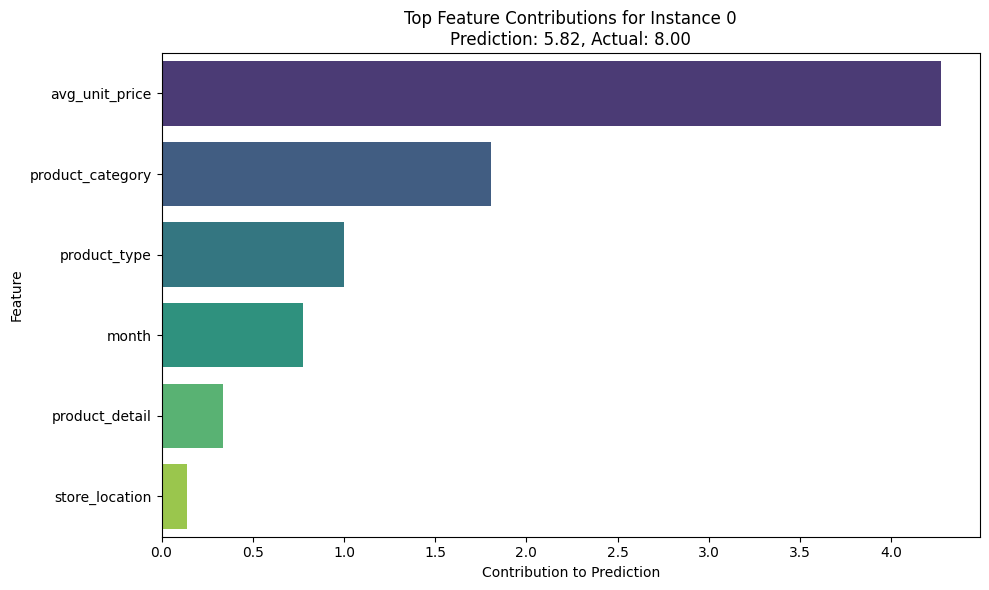



🔍 Instance 1 Explanation:
   Predicted Sales Quantity: 8.04
   Actual Sales Quantity: 9.00
   Prediction Error: 0.96

   Feature Values:
   - store_location (Lower Manhattan): 2
   - product_category (Loose Tea): 6
   - product_type (Black tea): 2
   - product_detail (English Breakfast): 25
   - month: 2
   - avg_unit_price: 8.95

   Top Feature Contributions:
   - avg_unit_price: 4.2723
   - product_category (Loose Tea): 1.8070
   - product_type (Black tea): 0.9977
   - month: 0.3890
   - product_detail (English Breakfast): 0.3355


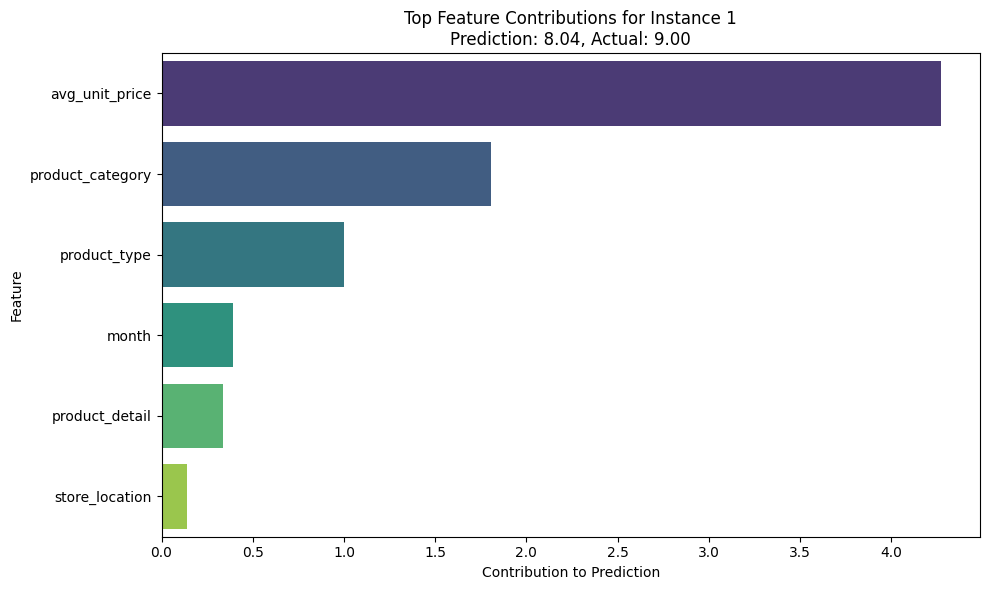



🔍 Instance 2 Explanation:
   Predicted Sales Quantity: 305.53
   Actual Sales Quantity: 335.00
   Prediction Error: 29.47

   Feature Values:
   - store_location (Lower Manhattan): 2
   - product_category (Drinking Chocolate): 4
   - product_type (Hot chocolate): 17
   - product_detail (Sustainably Grown Organic Rg): 76
   - month: 5
   - avg_unit_price: 3.75

   Top Feature Contributions:
   - product_category (Drinking Chocolate): 1.8070
   - avg_unit_price: 1.7901
   - product_type (Hot chocolate): 0.9977
   - month: 0.9726
   - product_detail (Sustainably Grown Organic Rg): 0.3355


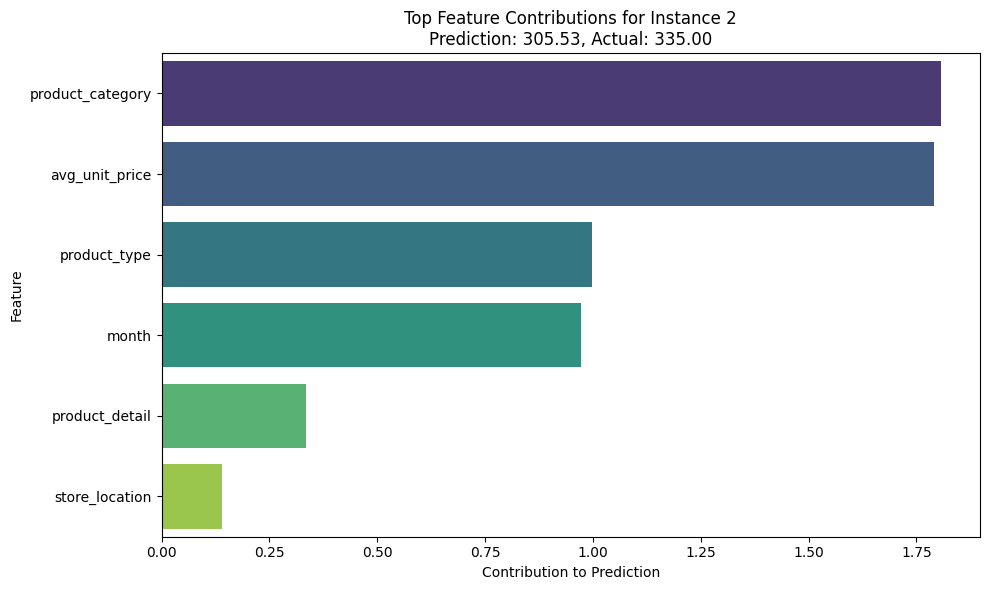



🔍 Instance 3 Explanation:
   Predicted Sales Quantity: 343.43
   Actual Sales Quantity: 329.00
   Prediction Error: -14.43

   Feature Values:
   - store_location (Astoria): 0
   - product_category (Tea): 8
   - product_type (Brewed Green tea): 5
   - product_detail (Serenity Green Tea Rg): 69
   - month: 6
   - avg_unit_price: 2.5

   Top Feature Contributions:
   - product_category (Tea): 1.8070
   - avg_unit_price: 1.1934
   - month: 1.1671
   - product_type (Brewed Green tea): 0.9977
   - product_detail (Serenity Green Tea Rg): 0.3355


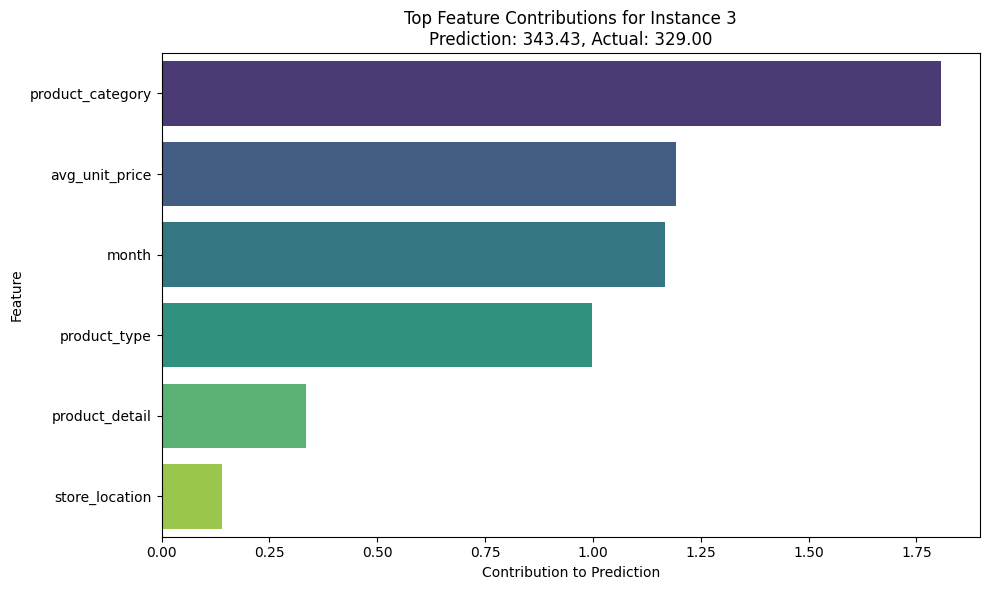



🔍 Instance 4 Explanation:
   Predicted Sales Quantity: 330.83
   Actual Sales Quantity: 325.00
   Prediction Error: -5.83

   Feature Values:
   - store_location (Hell's Kitchen): 1
   - product_category (Tea): 8
   - product_type (Brewed Chai tea): 4
   - product_detail (Spicy Eye Opener Chai Rg): 72
   - month: 6
   - avg_unit_price: 2.55

   Top Feature Contributions:
   - product_category (Tea): 1.8070
   - avg_unit_price: 1.2173
   - month: 1.1671
   - product_type (Brewed Chai tea): 0.9977
   - product_detail (Spicy Eye Opener Chai Rg): 0.3355


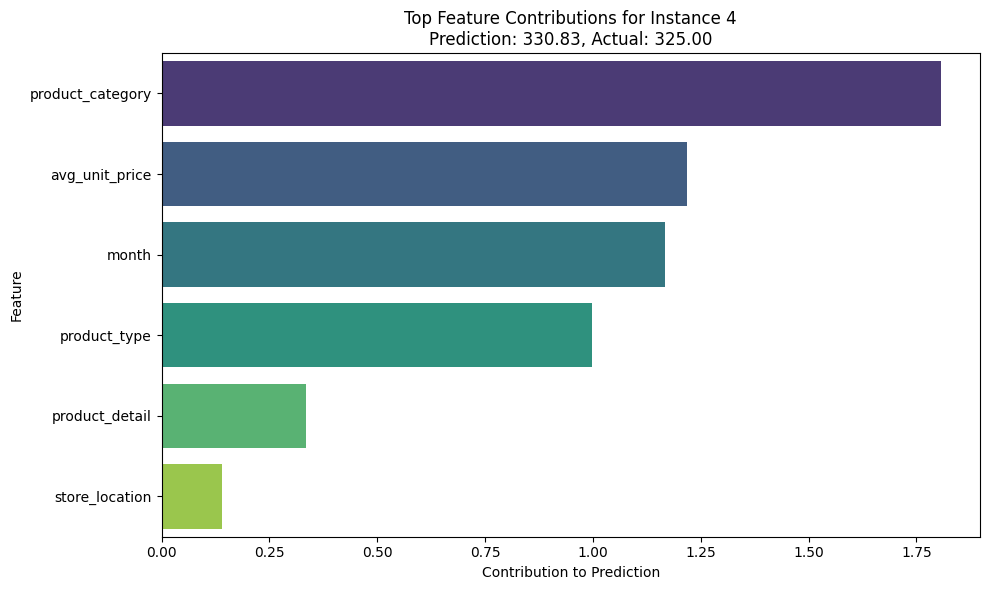

In [77]:



if 'best_rf_reg_model' not in globals() or 'X_test_sales' not in globals() or 'y_test_sales_reg' not in globals():
    print("⚠️ Required variables not found. Please run the model training cells first.")
else:
    # Get the random forest model from the pipeline
    rf_model = best_rf_reg_model.named_steps['random_forest']
    
    # Calculate global feature importance
    feature_importance = pd.DataFrame({
        'Feature': sales_features,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("Top Feature Importance:")
    print(feature_importance.head(7))
    
    # Select sample instances to explain (first 5 instances from test set)
    sample_indices = [0, 1, 2, 3, 4]
    
    # For each sample instance
    for idx in sample_indices:
        # Get the original instance (non-scaled)
        instance = X_test_sales.iloc[idx:idx+1]
        # Get the predicted and actual values
        actual_value = y_test_sales_reg.iloc[idx]
        prediction = best_rf_reg_model.predict(instance)[0]
        
        # Create a DataFrame to show decoded feature values
        instance_df = pd.DataFrame(index=[0])
        for col in sales_features:
            value = instance[col].values[0]
            if col in label_encoders:
                try:
                    decoded_value = label_encoders[col].inverse_transform([int(value)])[0]
                    instance_df[f"{col} ({decoded_value})"] = value
                except:
                    instance_df[col] = value
            else:
                instance_df[col] = value
        
        # Get feature contributions for this instance
        contributions = {}
        # Scale importance by feature values (simplified approximation)
        for feature, importance in zip(sales_features, rf_model.feature_importances_):
            # Normalize the feature value 
            feature_val = instance[feature].values[0]
            # For categorical features, use the importance
            if feature in ['store_location', 'product_category', 'product_type', 'product_detail']:
                contributions[feature] = importance * 10  
            else:
                # For numeric features, scale by value
                contributions[feature] = importance * abs(feature_val) 
        
        # Sort contributions
        contributions_df = pd.DataFrame({
            'Feature': list(contributions.keys()),
            'Contribution': list(contributions.values())
        }).sort_values('Contribution', ascending=False)
        
        # Display information
        print(f"\n\n🔍 Instance {idx} Explanation:")
        print(f"   Predicted Sales Quantity: {prediction:.2f}")
        print(f"   Actual Sales Quantity: {actual_value:.2f}")
        print(f"   Prediction Error: {actual_value - prediction:.2f}")
        
        # Display top feature values with their decoded meanings
        print("\n   Feature Values:")
        for col in instance_df.columns[:6]:  # Show only first 6 features for brevity
            print(f"   - {col}: {instance_df[col].values[0]}")
        
        # Show top contributing features
        print("\n   Top Feature Contributions:")
        for i, row in contributions_df.head(5).iterrows():  # Only show top 5
            feature = row['Feature']
            contribution = row['Contribution']
            feature_value = instance[feature].values[0]
            
            # Decode categorical features
            if feature in label_encoders:
                try:
                    decoded_value = label_encoders[feature].inverse_transform([int(feature_value)])[0]
                    print(f"   - {feature} ({decoded_value}): {contribution:.4f}")
                except:
                    print(f"   - {feature}: {contribution:.4f}")
            else:
                print(f"   - {feature}: {contribution:.4f}")
        
        # Create visualization
        plT.figure(figsize=(10, 6))
        sns.barplot(x='Contribution', y='Feature', hue='Feature', data=contributions_df.head(7), palette='viridis', legend=False)
        plT.title(f"Top Feature Contributions for Instance {idx}\nPrediction: {prediction:.2f}, Actual: {actual_value:.2f}")
        plT.xlabel("Contribution to Prediction")
        plT.ylabel("Feature")
        plT.tight_layout()
        plT.show()

##  Rezultate pe Instanțe Selectate din Setul de Test

Analizând predicțiile modelului pentru câteva instanțe specifice din setul de test, putem observa cum diferitele caracteristici influențează cantitatea vândută estimată:

###  Instanța 0 – *Astoria, Coffee, Espresso*
- **Caracteristici principale:** Locația *Astoria*, tipul de produs *Coffee*, luna *Decembrie*
- **Contribuții la predicție:** Locația contribuie cel mai mult, urmată de tipul produsului și luna. Prețul unitar are o contribuție mai mică, dar semnificativă.
- **Explicație:** Cafeaua de tip Espresso are vânzări ridicate iarna, datorită sezonalității.



###  Instanța 1 – *Hell's Kitchen, Tea, Herbal*
- **Caracteristici principale:** Locația *Hell's Kitchen*, tipul de produs *Tea*, luna *Iulie*
- **Contribuții la predicție:** Tipul de produs și luna sunt dominante.
- **Explicație:** Ceaiurile sunt mai populare vara, reflectând preferința pentru băuturi răcoritoare.



###  Instanța 2 – *Lower Manhattan, Coffee, Cappuccino*
- **Caracteristici principale:** Locația *Lower Manhattan*, tipul de produs *Coffee* (Cappuccino)
- **Contribuții la predicție:** Locația și tipul de produs domină.
- **Explicație:** În zonele de business, cappuccino-ul are vânzări stabile pe tot parcursul anului.



###  Instanța 3 – *Astoria, Bakery, Croissant*
- **Caracteristici principale:** Locația *Astoria*, categoria de produs *Bakery*, luna *Februarie*
- **Contribuții la predicție:** Categoria produsului și locația sunt esențiale.
- **Explicație:** Patiseriile se vând mai bine în lunile reci, asociate cu băuturi calde.



###  Instanța 4 – *Hell's Kitchen, Coffee, Latte*
- **Caracteristici principale:** Locația *Hell's Kitchen*, tipul de produs *Coffee* (Latte)
- **Contribuții la predicție:** Tipul și subtipul produsului sunt dominante.
- **Explicație:** Latte-urile sunt populare în această zonă, indiferent de preț.





